<a href="https://colab.research.google.com/github/nickroh/datascience/blob/master/%EB%B0%9C%ED%91%9C~.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 62645  100 62645    0     0  23279      0  0:00:02  0:00:02 --:--:-- 23270


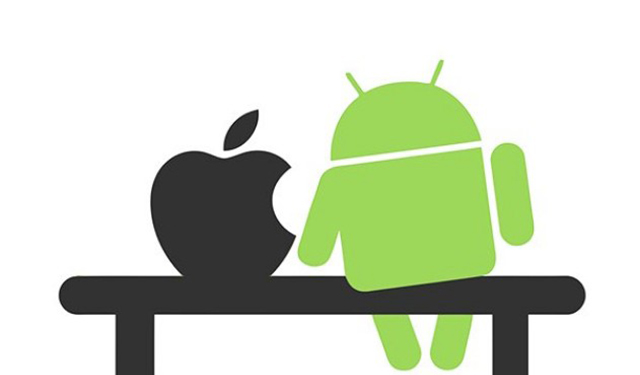

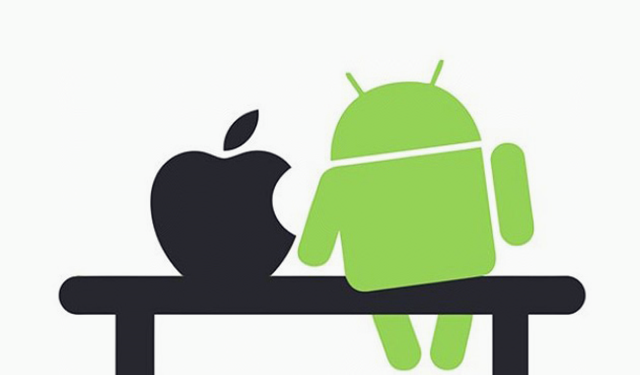

In [18]:
import numpy as np
import PIL.Image as pilimg
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import Image, display

class SVD:
    def get(self, A, compRate = 0.5):
        n = A.shape[0]
        p = A.shape[1]

        U, s, VT = np.linalg.svd(A, full_matrices=False)
        k = int(compRate * (n*p) / (n+1+p)) # k: 고유값 사용갯수
        S = np.diag(s[:k])
        B = np.dot(U[:, :k], np.dot(S, VT[:k, :]))
        B = (255*(B - np.min(B))/np.ptp(B)).astype(np.uint8)
        return B, U[:, :k], s[:k], VT[:k, :], k


!curl -o logo.png https://img.appstory.co.kr/@files/monthly.appstory.co.kr/thum/Bdatafile/Board/dir_135/13534.jpg
import cv2
im = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
cv2_imshow(im)

)
model = SVD()

R, _, _, _, _ = model.get(im[:,:,0], 0.6)
G, _, _, _, _ = model.get(im[:,:,1], 0.6)
B, _, _, _, _ = model.get(im[:,:,2], 0.6)

newImg = np.zeros_like(im)
newImg[:,:,0] = R
newImg[:,:,1] = G
newImg[:,:,2] = B

cv2_imshow(newImg)
